# Entra√Ænement du Neural Network pour Smart Chess sur Google Colab

Ce notebook permet d'entra√Æner le r√©seau de neurones pour l'√©valuation d'√©checs en utilisant les ressources GPU de Google Colab.

**Chemin du projet sur Drive:** `MyDrive/smart_chess_drive/smart-chess`

## Instructions
1. Aller dans **Runtime > Change runtime type > GPU** (T4 ou mieux)
2. Ex√©cuter les cellules dans l'ordre
3. Les mod√®les seront sauvegard√©s automatiquement sur votre Drive

## 1. V√©rification GPU

In [1]:
# V√©rifier la disponibilit√© du GPU
!nvidia-smi

Mon Oct 27 18:53:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   62C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 2. Montage Google Drive

In [2]:
# Monter Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 3. Configuration du chemin du projet

In [3]:
# D√©finir le chemin vers le projet sur votre Drive
import os
import sys

PROJECT_PATH = '/content/drive/MyDrive/smart_chess_drive/smart-chess'
os.chdir(PROJECT_PATH)
sys.path.insert(0, PROJECT_PATH)

print(f"R√©pertoire de travail: {os.getcwd()}")
print(f"\nContenu du r√©pertoire:")
for item in sorted(os.listdir('.')):
    print(f"  - {item}")

R√©pertoire de travail: /content/drive/MyDrive/smart_chess_drive/smart-chess

Contenu du r√©pertoire:
  - .git
  - .gitignore
  - README.md
  - ai
  - docs
  - prototypes


## 4. Installation des d√©pendances

In [4]:
# Installer les packages n√©cessaires
!pip install -q torch torchvision torchaudio
!pip install -q numpy matplotlib tqdm

print("‚úì Installation termin√©e")

‚úì Installation termin√©e


## 5. V√©rification de l'environnement PyTorch

In [5]:
import torch
import numpy as np

print("=" * 60)
print("CONFIGURATION SYST√àME")
print("=" * 60)
print(f"PyTorch version: {torch.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"\nCUDA disponible: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"Nom du GPU: {torch.cuda.get_device_name(0)}")
    props = torch.cuda.get_device_properties(0)
    print(f"M√©moire GPU totale: {props.total_memory / 1e9:.2f} GB")
    print(f"Compute Capability: {props.major}.{props.minor}")
else:
    print("‚ö†Ô∏è ATTENTION: GPU non disponible, l'entra√Ænement sera tr√®s lent!")
    print("   Allez dans Runtime > Change runtime type > GPU")

print("=" * 60)

CONFIGURATION SYST√àME
PyTorch version: 2.8.0+cu126
NumPy version: 2.0.2

CUDA disponible: True
CUDA version: 12.6
Nom du GPU: Tesla T4
M√©moire GPU totale: 15.83 GB
Compute Capability: 7.5


## 6. Import des modules du projet

In [6]:
# Importer les modules n√©cessaires depuis le projet (robuste √† l'emplacement du repo sur Drive)
import os
import sys
import importlib

# Assurez-vous que PROJECT_PATH est d√©fini et ajoutez √©galement le dossier `ai` au PYTHONPATH
PROJECT_PATH = '/content/drive/MyDrive/smart_chess_drive/smart-chess'
AI_SUBDIR = os.path.join(PROJECT_PATH, 'ai')

# V√©rifier les chemins alternatifs (si l'utilisateur a copi√© le repo dans /content)
ALT_PATH = '/content/smart-chess'

# Choisir un chemin existant
if not os.path.isdir(PROJECT_PATH) and os.path.isdir(ALT_PATH):
    PROJECT_PATH = ALT_PATH

if not os.path.isdir(PROJECT_PATH):
    raise FileNotFoundError(f"R√©pertoire projet introuvable: {PROJECT_PATH}. Montez Drive et v√©rifiez le chemin.")

# Ajouter au sys.path si n√©cessaire
if PROJECT_PATH not in sys.path:
    sys.path.insert(0, PROJECT_PATH)
if AI_SUBDIR not in sys.path and os.path.isdir(AI_SUBDIR):
    sys.path.insert(0, AI_SUBDIR)

# Se placer dans le r√©pertoire projet
os.chdir(PROJECT_PATH)

print('R√©pertoire de travail:', os.getcwd())
print('\nQuelques fichiers √† la racine du projet:')
print(sorted(os.listdir(PROJECT_PATH))[:50])
print('\nContenu du dossier ai/:')
print(sorted(os.listdir(AI_SUBDIR))[:100])

# Diagnostic d'import direct pour le module Chess
try:
    import Chess
    print('\n‚úÖ Import direct `Chess` OK (module trouv√© via sys.path)')
except Exception as e:
    print('\n‚ùå Import direct `Chess` a √©chou√©:', e)
    print('V√©rifiez que `ai/Chess.py` existe et que le dossier ai/ est dans sys.path')

# Maintenant importer le module d'entra√Ænement (trainer)
try:
    import ai.NN.train_torch as trainer
    import ai.NN.torch_nn_evaluator as torch_eval
    from ai.Chess_v2 import Chess
    print('\n‚úì Modules import√©s avec succ√®s!')
except Exception as e:
    print('\n‚ùå Erreur d\'import lors de l\'import du trainer:', e)
    raise


R√©pertoire de travail: /content/drive/MyDrive/smart_chess_drive/smart-chess

Quelques fichiers √† la racine du projet:
['.git', '.gitignore', 'README.md', 'ai', 'docs', 'prototypes']

Contenu du dossier ai/:
['AI_reduction', 'Chess.py', 'ChessInteractifv2.py', 'Chess_v2.py', 'NN', 'Null_move_AI', 'Old_AI', 'Player.py', 'Profile', 'Tests.py', '__init__.py', '__pycache__', 'alphabeta.py', 'alphabeta_engine.py', 'alphabeta_engine_v2.py', 'analyze_reduction_overhead.py', 'base_engine.py', 'check_dataset_stats.py', 'check_gpu.py', 'check_performance.py', 'checkpoints', 'chess_model_checkpoint.pt', 'debug_conversion.py', 'engine_match.py', 'evaluator.py', 'example_move_reduction.py', 'fast_evaluator.py', 'journal-experiments.md', 'optimized_chess.py', 'profile_report_1760344602.txt', 'test_depth_6_performance.py', 'test_depth_6_quick.py', 'test_depth_effectiveness.py', 'test_engines_v2.py', 'test_evaluator_performance.py', 'test_generalization.py', 'test_move_reduction.py', 'test_null_move.

## 7. Configuration de l'entra√Ænement

In [7]:
# Param√®tres d'entra√Ænement
CONFIG = {
    # G√©n√©ration de donn√©es
    'num_games': 10000,          # Nombre de parties √† g√©n√©rer pour l'entra√Ænement

    # Hyperparam√®tres
    'batch_size': 256,           # Taille du batch (augmenter si GPU puissant)
    'epochs': 50,                # Nombre d'√©poques d'entra√Ænement
    'learning_rate': 0.001,      # Taux d'apprentissage

    # Configuration syst√®me
    'device': 'cuda' if torch.cuda.is_available() else 'cpu',
    'num_workers': 2,            # Workers pour le DataLoader

    # Sauvegarde
    'checkpoint_path': 'ai/chess_model_checkpoint.pt',
    'save_interval': 5,          # Sauvegarder tous les N √©poques
}

print("=" * 60)
print("CONFIGURATION DE L'ENTRA√éNEMENT")
print("=" * 60)
for key, value in CONFIG.items():
    print(f"{key:20s}: {value}")
print("=" * 60)

if CONFIG['device'] == 'cpu':
    print("\n‚ö†Ô∏è ATTENTION: Entra√Ænement sur CPU d√©tect√©!")
    print("   R√©duisez num_games et epochs pour un test rapide.")

CONFIGURATION DE L'ENTRA√éNEMENT
num_games           : 10000
batch_size          : 256
epochs              : 50
learning_rate       : 0.001
device              : cuda
num_workers         : 2
checkpoint_path     : ai/chess_model_checkpoint.pt
save_interval       : 5


## 8. G√©n√©ration des donn√©es d'entra√Ænement

Cette √©tape g√©n√®re des parties d'√©checs al√©atoires et calcule les √©valuations de position.
**Attention:** Cela peut prendre 15-30 minutes selon le nombre de parties.

In [8]:
# Localiser le dataset sur Google Drive et pr√©parer le dossier de checkpoints
import os
from glob import glob

# Chemin attendu du dossier contenant le dataset (donn√© par l'user)
# Updated based on user's feedback that the file is directly in smart_chess_drive
DATASET_DIR = '/content/drive/MyDrive/smart_chess_drive/'

# Chercher un fichier .csv dans DATASET_DIR
DATASET_CSV = None
if os.path.exists(DATASET_DIR):
    csvs = glob(os.path.join(DATASET_DIR, '*.csv'))
    if len(csvs) > 0:
        # Assuming there's only one relevant CSV in that dir, pick the first one
        DATASET_CSV = csvs[0]
        print(f'‚úÖ Dataset CSV trouv√©: {DATASET_CSV}')
    else:
        print(f'‚ùå Aucun fichier .csv trouv√© dans {DATASET_DIR}. Placez votre fichier chessData.csv dans ce dossier.')
else:
    print(f'‚ùå Dossier dataset introuvable: {DATASET_DIR}. V√©rifiez le chemin sur votre Drive.')

# Cr√©er un dossier de checkpoints dans le repo sur Drive (persistant)
CKPT_DIR = '/content/drive/MyDrive/smart_chess_drive/smart-chess/ai/checkpoints'
os.makedirs(CKPT_DIR, exist_ok=True)
print('Dossier de checkpoints (cr√©√© si manquant):', CKPT_DIR)

# Exposer variables utiles
print('\nVariables expos√©es:')
print(' DATASET_CSV =', DATASET_CSV)
print(' CKPT_DIR =', CKPT_DIR)

‚úÖ Dataset CSV trouv√©: /content/drive/MyDrive/smart_chess_drive/chessData.csv
Dossier de checkpoints (cr√©√© si manquant): /content/drive/MyDrive/smart_chess_drive/smart-chess/ai/checkpoints

Variables expos√©es:
 DATASET_CSV = /content/drive/MyDrive/smart_chess_drive/chessData.csv
 CKPT_DIR = /content/drive/MyDrive/smart_chess_drive/smart-chess/ai/checkpoints


In [16]:
from tqdm import tqdm
import time

print("Chargement du dataset (depuis chessData)...")

# Pr√©f√©rer la variable DATASET_CSV (d√©finie apr√®s le montage Drive) sinon utiliser la valeur par d√©faut du module trainer
dataset_path = globals().get('DATASET_CSV') # Use the DATASET_CSV variable directly

if dataset_path is None:
    raise FileNotFoundError('Aucun chemin de dataset d√©fini. Montez Drive et placez le fichier CSV dans MyDrive/smart_chess_drive/chessData')

start_time = time.time()

# Utiliser la fonction de chargement du script d'entra√Ænement pour assurer le m√™me pr√©traitement
fens, evaluations = trainer.load_data(dataset_path) # Pass the dataset_path explicitly

# Variables attendues plus bas dans le notebook
X_train = fens
y_train = evaluations

elapsed_time = time.time() - start_time

print("\n" + "=" * 60)
print("DONN√âES CHARG√âES")
print("=" * 60)
print(f"Nombre total de positions: {len(X_train):,}")
print(f"Temps √©coul√©: {elapsed_time:.1f}s ({elapsed_time/60:.1f} min)")
print("=" * 60)

# Statistiques sur les √©valuations
print(f"\nStatistiques sur les √©valuations:")
print(f"  Min: {y_train.min():.4f}")
print(f"  Max: {y_train.max():.4f}")
print(f"  Moyenne: {y_train.mean():.4f}")
print(f"  √âcart-type: {y_train.std():.4f}")

Chargement du dataset (depuis chessData)...
üìÇ Chargement du dataset depuis /content/drive/MyDrive/smart_chess_drive/chessData.csv...
üßπ Nettoyage : 190154 lignes corrompues supprim√©es.
‚úÖ 12,767,881 positions valides charg√©es.

DONN√âES CHARG√âES
Nombre total de positions: 12,767,881
Temps √©coul√©: 22.5s (0.4 min)

Statistiques sur les √©valuations:
  Min: -15.3120
  Max: 15.3190
  Moyenne: 0.0455
  √âcart-type: 0.8139


In [ ]:
import inspect
import ai.NN.train_torch as trainer

try:
    # Get the source code of the load_data function
    source_code = inspect.getsource(trainer.load_data)
    print("Source code of trainer.load_data:")
    print("=" * 60)
    print(source_code)
    print("=" * 60)
except TypeError:
    print("Could not get source code for trainer.load_data. It might not be a function defined in the file.")
except FileNotFoundError:
    print("Could not find the train_torch.py file.")
except Exception as e:
    print(f"An error occurred while trying to get source code: {e}")

In [ ]:
import os

file_path = os.path.join(PROJECT_PATH, 'ai/NN/train_torch.py')

# Read the content of the file
with open(file_path, 'r') as f:
    content = f.read()

# Assuming the load_data function signature is currently load_data():
# We need to find the function definition and modify it to accept dataset_path
# This is a simple string replacement and might need adjustment based on the actual code
old_def = 'def load_data():'
new_def = 'def load_data(dataset_path):'
old_data_loading_line = "df = pd.read_csv('C:\\\\Users\\\\gauti\\\\OneDrive\\\\Documents\\\\UE commande\\\\chessData.csv')" # This is a guess, may need adjustment
new_data_loading_line = "df = pd.read_csv(dataset_path)"


if old_def in content and old_data_loading_line in content:
    content = content.replace(old_def, new_def)
    content = content.replace(old_data_loading_line, new_data_loading_line)
    # Write the modified content back to the file
    with open(file_path, 'w') as f:
        f.write(content)
    print(f"Successfully modified {file_path} to accept and use dataset_path in load_data function.")
elif old_def in content:
     print(f"Found function definition '{old_def}', but could not find the specific data loading line '{old_data_loading_line}' to replace.")
     print("Please inspect the `load_data` function in `ai/NN/train_torch.py` and manually update the file path to use the `dataset_path` argument.")
else:
    print(f"Could not find the function definition '{old_def}' in {file_path}. Please inspect the file manually.")

## 9. Cr√©ation du dataset et du dataloader

In [ ]:
from torch.utils.data import DataLoader
from ai.NN.train_torch import ChessDataset # Import ChessDataset

# Cr√©er le dataset
dataset = ChessDataset(X_train, y_train)

# Cr√©er le dataloader
train_loader = DataLoader(
    dataset,
    batch_size=CONFIG['batch_size'],
    shuffle=True,
    num_workers=CONFIG['num_workers'],
    pin_memory=True if CONFIG['device'] == 'cuda' else False
)

print("=" * 60)
print("DATALOADER CONFIGUR√â")
print("=" * 60)
print(f"Taille du dataset: {len(dataset):,} √©chantillons")
print(f"Nombre de batches: {len(train_loader):,}")
print(f"Taille du batch: {CONFIG['batch_size']}")
print(f"Derni√®re batch: {len(dataset) % CONFIG['batch_size']} √©chantillons")
print("=" * 60)

## 10. Cr√©ation du mod√®le

In [ ]:
# Cr√©er le mod√®le et le d√©placer sur le device appropri√©
from ai.NN.torch_nn_evaluator import TorchNNEvaluator # Import TorchNNEvaluator from torch_nn_evaluator

model = TorchNNEvaluator().to(CONFIG['device'])

# Afficher l'architecture
print("=" * 60)
print("ARCHITECTURE DU MOD√àLE")
print("=" * 60)
print(model)
print("=" * 60)

# Compter les param√®tres
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"\nNombre total de param√®tres: {total_params:,}")
print(f"Param√®tres entra√Ænables: {trainable_params:,}")
print(f"Device: {CONFIG['device']}")

# Estimer la taille m√©moire du mod√®le
param_size_mb = total_params * 4 / (1024 ** 2)  # 4 bytes par float32
print(f"Taille estim√©e du mod√®le: {param_size_mb:.2f} MB")

## 11. Entra√Ænement du mod√®le

Cette √©tape lance l'entra√Ænement complet. Les checkpoints sont sauvegard√©s automatiquement sur votre Drive.

In [ ]:
# @title
# Configurer et lancer le script d'entra√Ænement `ai.NN.train_torch` en adaptant les chemins pour Colab/Drive
import os
import importlib

if DATASET_CSV is None:
    raise FileNotFoundError(f"Dataset non trouv√© dans: {DATASET_DIR}")

# Importer le module d'entra√Ænement
import ai.NN.train_torch as trainer

# Reload the module to pick up recent changes
importlib.reload(trainer)


# Rediriger les chemins dataset et checkpoints vers Drive
trainer.DATASET_PATH = DATASET_CSV
trainer.CHECKPOINT_FILE = os.path.join(CKPT_DIR, os.path.basename(trainer.CHECKPOINT_FILE))
trainer.WEIGHTS_FILE = os.path.join(CKPT_DIR, os.path.basename(trainer.WEIGHTS_FILE))

# Harmonisation des tailles de batch (Option B):
# On force le module trainer √† utiliser la valeur d√©finie dans CONFIG['batch_size']
try:
    trainer.BATCH_SIZE = CONFIG['batch_size']
    print(f'‚úÖ Harmonisation: trainer.BATCH_SIZE = {trainer.BATCH_SIZE}')
except Exception as e:
    print('‚ö†Ô∏è Impossible de d√©finir trainer.BATCH_SIZE:', e)

# --- Apply user-requested global hyperparameter changes ---
# Increase hidden layer size to 512 and set per-epoch samples to 200k
try:
    trainer.HIDDEN_SIZE = 512
    trainer.MAX_SAMPLES = 200_000
    print(f"‚úÖ Applied global changes: trainer.HIDDEN_SIZE={trainer.HIDDEN_SIZE}, trainer.MAX_SAMPLES={trainer.MAX_SAMPLES}")
except Exception as e:
    print('‚ö†Ô∏è Impossible de d√©finir trainer.HIDDEN_SIZE / trainer.MAX_SAMPLES:', e)

# Optionally set other CONFIG parameters from the notebook if needed
# trainer.EPOCHS = CONFIG['epochs']
# trainer.LEARNING_RATE = CONFIG['learning_rate']
# trainer.DEVICE = CONFIG['device']

# Optionnel: r√©duire pour test rapide (d√©commentez si besoin)
# trainer.EPOCHS = 2
# trainer.MAX_SAMPLES = 5000

print('Configuration trainer:')
print(' DATASET_PATH=', trainer.DATASET_PATH)
print(' CHECKPOINT_FILE=', trainer.CHECKPOINT_FILE)
print(' WEIGHTS_FILE=', trainer.WEIGHTS_FILE)
print(' EPOCHS=', trainer.EPOCHS)
print(' MAX_SAMPLES=', trainer.MAX_SAMPLES)


# Lancer l'entra√Ænement
trainer.main()


üñ•Ô∏è  Device: cuda
üöÄ GPU: Tesla T4
üíæ GPU Memory: 15.83 GB
‚úÖ Harmonisation: trainer.BATCH_SIZE = 256
‚úÖ Applied global changes: trainer.HIDDEN_SIZE=512, trainer.MAX_SAMPLES=50000
Configuration trainer:
 DATASET_PATH= /content/drive/MyDrive/smart_chess_drive/chessData.csv
 CHECKPOINT_FILE= /content/drive/MyDrive/smart_chess_drive/smart-chess/ai/checkpoints/chess_model_checkpoint.pt
 WEIGHTS_FILE= /content/drive/MyDrive/smart_chess_drive/smart-chess/ai/checkpoints/chess_nn_weights.npz
 EPOCHS= 20
 MAX_SAMPLES= 50000
üìÇ Chargement du dataset depuis /content/drive/MyDrive/smart_chess_drive/chessData.csv...
üßπ Nettoyage : 190154 lignes corrompues supprim√©es.
‚úÖ 12,767,881 positions valides charg√©es.

üìä Dataset complet: 12,767,881 positions
üì• Chargement du checkpoint PyTorch: /content/drive/MyDrive/smart_chess_drive/smart-chess/ai/checkpoints/chess_model_checkpoint.pt
‚ö†Ô∏è Warning while loading checkpoint with strict=True: Error(s) in loading state_dict for TorchNNE

Epoch 1/20:   3%|‚ñé         | 6/196 [00:00<00:03, 56.65it/s, loss=0.5702]


[DEBUG batch 0] targets mean=0.1125 std=0.7436; preds mean=0.1257 std=0.3603; RMSE=0.6029; corr=0.5962


Epoch 1/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 196/196 [00:03<00:00, 57.62it/s, loss=0.6110]



üîç √âvaluation epoch 1...

EPOCH 1/20 - √âvaluation sur 5,000 positions
  RMSE:        0.6462  (baseline: 0.8562)
  MAE:         0.2615
  Am√©lioration: +24.5% vs baseline
  Corr√©lation: 0.6602
  Std preds:   0.5048  (cible: 0.8562)
  Mean preds:  0.0244  (cible: 0.0422)
  ‚Üí  Apprentissage en cours

üíæ Nouveau meilleur RMSE: 0.6462 - Sauvegarde...
Checkpoint PyTorch sauvegard√© dans /content/drive/MyDrive/smart_chess_drive/smart-chess/ai/checkpoints/chess_model_checkpoint.pt
Poids sauvegard√©s (npz) dans /content/drive/MyDrive/smart_chess_drive/smart-chess/ai/checkpoints/chess_nn_weights.npz

[Epoch 2] üé≤ √âchantillonnage: 50,000 positions sur 12,767,881
üî• Warmup epoch 2/3: LR = 0.000700


Epoch 2/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 196/196 [00:03<00:00, 51.25it/s, loss=0.6145]



üîç √âvaluation epoch 2...

EPOCH 2/20 - √âvaluation sur 5,000 positions
  RMSE:        0.5322  (baseline: 0.7341)
  MAE:         0.2265
  Am√©lioration: +27.5% vs baseline
  Corr√©lation: 0.6892
  Std preds:   0.4951  (cible: 0.7341)
  Mean preds:  0.0285  (cible: 0.0435)
  ‚Üí  Apprentissage en cours

üíæ Nouveau meilleur RMSE: 0.5322 - Sauvegarde...
Checkpoint PyTorch sauvegard√© dans /content/drive/MyDrive/smart_chess_drive/smart-chess/ai/checkpoints/chess_model_checkpoint.pt
Poids sauvegard√©s (npz) dans /content/drive/MyDrive/smart_chess_drive/smart-chess/ai/checkpoints/chess_nn_weights.npz

[Epoch 3] üé≤ √âchantillonnage: 50,000 positions sur 12,767,881
üî• Warmup epoch 3/3: LR = 0.001000


Epoch 3/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 196/196 [00:03<00:00, 60.03it/s, loss=0.6178]



üîç √âvaluation epoch 3...

EPOCH 3/20 - √âvaluation sur 5,000 positions
  RMSE:        0.5850  (baseline: 0.8079)
  MAE:         0.2420
  Am√©lioration: +27.6% vs baseline
  Corr√©lation: 0.6937
  Std preds:   0.5003  (cible: 0.8079)
  Mean preds:  0.0381  (cible: 0.0353)
  ‚Üí  Apprentissage en cours


[Epoch 4] üé≤ √âchantillonnage: 50,000 positions sur 12,767,881


Epoch 4/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 196/196 [00:03<00:00, 55.59it/s, loss=0.6277]



üîç √âvaluation epoch 4...

EPOCH 4/20 - √âvaluation sur 5,000 positions
  RMSE:        0.6064  (baseline: 0.8609)
  MAE:         0.2553
  Am√©lioration: +29.6% vs baseline
  Corr√©lation: 0.7169
  Std preds:   0.5305  (cible: 0.8609)
  Mean preds:  0.0359  (cible: 0.0384)
  ‚Üí  Apprentissage en cours


[Epoch 5] üé≤ √âchantillonnage: 50,000 positions sur 12,767,881


Epoch 5/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 196/196 [00:03<00:00, 52.40it/s, loss=0.6280]



üîç √âvaluation epoch 5...

EPOCH 5/20 - √âvaluation sur 5,000 positions
  RMSE:        0.5321  (baseline: 0.7628)
  MAE:         0.2338
  Am√©lioration: +30.2% vs baseline
  Corr√©lation: 0.7276
  Std preds:   0.4610  (cible: 0.7628)
  Mean preds:  0.0262  (cible: 0.0485)
  ‚úì  Bon apprentissage!

üíæ Nouveau meilleur RMSE: 0.5321 - Sauvegarde...
Checkpoint PyTorch sauvegard√© dans /content/drive/MyDrive/smart_chess_drive/smart-chess/ai/checkpoints/chess_model_checkpoint.pt
Poids sauvegard√©s (npz) dans /content/drive/MyDrive/smart_chess_drive/smart-chess/ai/checkpoints/chess_nn_weights.npz

[Epoch 6] üé≤ √âchantillonnage: 50,000 positions sur 12,767,881


Epoch 6/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 196/196 [00:03<00:00, 60.88it/s, loss=0.6249]



üîç √âvaluation epoch 6...

EPOCH 6/20 - √âvaluation sur 5,000 positions
  RMSE:        0.5669  (baseline: 0.8004)
  MAE:         0.2437
  Am√©lioration: +29.2% vs baseline
  Corr√©lation: 0.7120
  Std preds:   0.4967  (cible: 0.8004)
  Mean preds:  0.0421  (cible: 0.0530)
  ‚Üí  Apprentissage en cours


[Epoch 7] üé≤ √âchantillonnage: 50,000 positions sur 12,767,881


Epoch 7/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 196/196 [00:03<00:00, 59.88it/s, loss=0.6118]



üîç √âvaluation epoch 7...

EPOCH 7/20 - √âvaluation sur 5,000 positions
  RMSE:        0.5841  (baseline: 0.7911)
  MAE:         0.2472
  Am√©lioration: +26.2% vs baseline
  Corr√©lation: 0.6884
  Std preds:   0.4351  (cible: 0.7911)
  Mean preds:  0.0469  (cible: 0.0512)
  ‚Üí  Apprentissage en cours


[Epoch 8] üé≤ √âchantillonnage: 50,000 positions sur 12,767,881


Epoch 8/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 196/196 [00:03<00:00, 53.12it/s, loss=0.6139]



üîç √âvaluation epoch 8...

EPOCH 8/20 - √âvaluation sur 5,000 positions
  RMSE:        0.5597  (baseline: 0.8092)
  MAE:         0.2378
  Am√©lioration: +30.8% vs baseline
  Corr√©lation: 0.7286
  Std preds:   0.5114  (cible: 0.8092)
  Mean preds:  0.0424  (cible: 0.0412)
  ‚úì  Bon apprentissage!


[Epoch 9] üé≤ √âchantillonnage: 50,000 positions sur 12,767,881


Epoch 9/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 196/196 [00:03<00:00, 58.15it/s, loss=0.6233]



üîç √âvaluation epoch 9...

EPOCH 9/20 - √âvaluation sur 5,000 positions
  RMSE:        0.5423  (baseline: 0.7853)
  MAE:         0.2399
  Am√©lioration: +30.9% vs baseline
  Corr√©lation: 0.7277
  Std preds:   0.5087  (cible: 0.7853)
  Mean preds:  0.0438  (cible: 0.0521)
  ‚úì  Bon apprentissage!


[Epoch 10] üé≤ √âchantillonnage: 50,000 positions sur 12,767,881


Epoch 10/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 196/196 [00:03<00:00, 54.80it/s, loss=0.6219]



üîç √âvaluation epoch 10...

EPOCH 10/20 - √âvaluation sur 5,000 positions
  RMSE:        0.5744  (baseline: 0.7825)
  MAE:         0.2436
  Am√©lioration: +26.6% vs baseline
  Corr√©lation: 0.6857
  Std preds:   0.4627  (cible: 0.7825)
  Mean preds:  0.0426  (cible: 0.0501)
  ‚Üí  Apprentissage en cours


[Epoch 11] üé≤ √âchantillonnage: 50,000 positions sur 12,767,881


Epoch 11/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 196/196 [00:03<00:00, 60.41it/s, loss=0.6196]



üîç √âvaluation epoch 11...

EPOCH 11/20 - √âvaluation sur 5,000 positions
  RMSE:        0.5359  (baseline: 0.7187)
  MAE:         0.2354
  Am√©lioration: +25.4% vs baseline
  Corr√©lation: 0.6674
  Std preds:   0.4664  (cible: 0.7187)
  Mean preds:  0.0166  (cible: 0.0397)
  ‚Üí  Apprentissage en cours


[Epoch 12] üé≤ √âchantillonnage: 50,000 positions sur 12,767,881


Epoch 12/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 196/196 [00:03<00:00, 58.62it/s, loss=0.6105]



üîç √âvaluation epoch 12...

EPOCH 12/20 - √âvaluation sur 5,000 positions
  RMSE:        0.6108  (baseline: 0.8253)
  MAE:         0.2556
  Am√©lioration: +26.0% vs baseline
  Corr√©lation: 0.6806
  Std preds:   0.4753  (cible: 0.8253)
  Mean preds:  0.0567  (cible: 0.0595)
  ‚Üí  Apprentissage en cours


[Epoch 13] üé≤ √âchantillonnage: 50,000 positions sur 12,767,881


Epoch 13/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 196/196 [00:03<00:00, 54.18it/s, loss=0.6208]



üîç √âvaluation epoch 13...

EPOCH 13/20 - √âvaluation sur 5,000 positions
  RMSE:        0.5561  (baseline: 0.7603)
  MAE:         0.2384
  Am√©lioration: +26.9% vs baseline
  Corr√©lation: 0.6866
  Std preds:   0.4615  (cible: 0.7603)
  Mean preds:  0.0482  (cible: 0.0450)
  ‚Üí  Apprentissage en cours


[Epoch 14] üé≤ √âchantillonnage: 50,000 positions sur 12,767,881


Epoch 14/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 196/196 [00:03<00:00, 58.43it/s, loss=0.5968]



üîç √âvaluation epoch 14...

EPOCH 14/20 - √âvaluation sur 5,000 positions
  RMSE:        0.6054  (baseline: 0.8427)
  MAE:         0.2471
  Am√©lioration: +28.2% vs baseline
  Corr√©lation: 0.7035
  Std preds:   0.5067  (cible: 0.8427)
  Mean preds:  0.0370  (cible: 0.0559)
  ‚Üí  Apprentissage en cours


[Epoch 15] üé≤ √âchantillonnage: 50,000 positions sur 12,767,881


Epoch 15/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 196/196 [00:03<00:00, 58.49it/s, loss=0.6025]



üîç √âvaluation epoch 15...

EPOCH 15/20 - √âvaluation sur 5,000 positions
  RMSE:        0.5757  (baseline: 0.8102)
  MAE:         0.2515
  Am√©lioration: +28.9% vs baseline
  Corr√©lation: 0.7115
  Std preds:   0.4925  (cible: 0.8102)
  Mean preds:  0.0307  (cible: 0.0437)
  ‚Üí  Apprentissage en cours


[Epoch 16] üé≤ √âchantillonnage: 50,000 positions sur 12,767,881


Epoch 16/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 196/196 [00:03<00:00, 51.54it/s, loss=0.5955]



üîç √âvaluation epoch 16...

EPOCH 16/20 - √âvaluation sur 5,000 positions
  RMSE:        0.5425  (baseline: 0.7641)
  MAE:         0.2292
  Am√©lioration: +29.0% vs baseline
  Corr√©lation: 0.7071
  Std preds:   0.4919  (cible: 0.7641)
  Mean preds:  0.0448  (cible: 0.0492)
  ‚Üí  Apprentissage en cours


[Epoch 17] üé≤ √âchantillonnage: 50,000 positions sur 12,767,881


Epoch 17/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 196/196 [00:03<00:00, 56.41it/s, loss=0.6093]



üîç √âvaluation epoch 17...

EPOCH 17/20 - √âvaluation sur 5,000 positions
  RMSE:        0.6070  (baseline: 0.8401)
  MAE:         0.2501
  Am√©lioration: +27.8% vs baseline
  Corr√©lation: 0.7047
  Std preds:   0.4790  (cible: 0.8401)
  Mean preds:  0.0344  (cible: 0.0525)
  ‚Üí  Apprentissage en cours


[Epoch 18] üé≤ √âchantillonnage: 50,000 positions sur 12,767,881


Epoch 18/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 196/196 [00:03<00:00, 55.42it/s, loss=0.6207]



üîç √âvaluation epoch 18...

EPOCH 18/20 - √âvaluation sur 5,000 positions
  RMSE:        0.5133  (baseline: 0.7356)
  MAE:         0.2289
  Am√©lioration: +30.2% vs baseline
  Corr√©lation: 0.7179
  Std preds:   0.4948  (cible: 0.7356)
  Mean preds:  0.0310  (cible: 0.0246)
  ‚úì  Bon apprentissage!

üíæ Nouveau meilleur RMSE: 0.5133 - Sauvegarde...
Checkpoint PyTorch sauvegard√© dans /content/drive/MyDrive/smart_chess_drive/smart-chess/ai/checkpoints/chess_model_checkpoint.pt
Poids sauvegard√©s (npz) dans /content/drive/MyDrive/smart_chess_drive/smart-chess/ai/checkpoints/chess_nn_weights.npz

[Epoch 19] üé≤ √âchantillonnage: 50,000 positions sur 12,767,881


Epoch 19/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 196/196 [00:03<00:00, 51.78it/s, loss=0.6100]



üîç √âvaluation epoch 19...

EPOCH 19/20 - √âvaluation sur 5,000 positions
  RMSE:        0.6115  (baseline: 0.8707)
  MAE:         0.2560
  Am√©lioration: +29.8% vs baseline
  Corr√©lation: 0.7196
  Std preds:   0.5367  (cible: 0.8707)
  Mean preds:  0.0456  (cible: 0.0629)
  ‚Üí  Apprentissage en cours


[Epoch 20] üé≤ √âchantillonnage: 50,000 positions sur 12,767,881


Epoch 20/20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 196/196 [00:03<00:00, 58.30it/s, loss=0.6055]



üîç √âvaluation epoch 20...

EPOCH 20/20 - √âvaluation sur 5,000 positions
  RMSE:        0.5411  (baseline: 0.7781)
  MAE:         0.2328
  Am√©lioration: +30.5% vs baseline
  Corr√©lation: 0.7265
  Std preds:   0.4829  (cible: 0.7781)
  Mean preds:  0.0480  (cible: 0.0567)
  ‚úì  Bon apprentissage!


üéâ Entra√Ænement termin√©!
üìä Meilleur RMSE: 0.5133

üíæ Sauvegarde finale...
Checkpoint PyTorch sauvegard√© dans /content/drive/MyDrive/smart_chess_drive/smart-chess/ai/checkpoints/chess_model_checkpoint.pt
Poids sauvegard√©s (npz) dans /content/drive/MyDrive/smart_chess_drive/smart-chess/ai/checkpoints/chess_nn_weights.npz
‚úÖ Mod√®le sauvegard√© dans /content/drive/MyDrive/smart_chess_drive/smart-chess/ai/checkpoints/chess_model_checkpoint.pt et /content/drive/MyDrive/smart_chess_drive/smart-chess/ai/checkpoints/chess_nn_weights.npz


## 12. Visualisation des r√©sultats

NameError: name 'history' is not defined

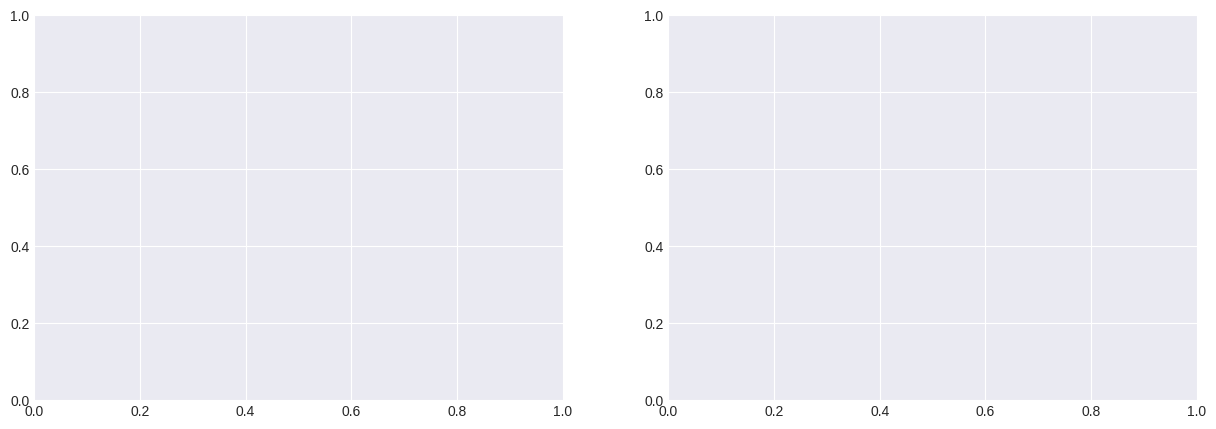

In [15]:
# @title
import matplotlib.pyplot as plt

# Configurer le style des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Graphique 1: Loss
axes[0].plot(history['loss'], linewidth=2, color='#2E86AB', label='Training Loss')
axes[0].set_xlabel('√âpoque', fontsize=12)
axes[0].set_ylabel('Loss (MSE)', fontsize=12)
axes[0].set_title('√âvolution de la perte pendant l\'entra√Ænement', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Afficher les valeurs min/max
min_loss = min(history['loss'])
max_loss = max(history['loss'])
axes[0].axhline(y=min_loss, color='green', linestyle='--', alpha=0.5, label=f'Min: {min_loss:.6f}')
axes[0].legend(fontsize=10)

# Graphique 2: MAE (si disponible)
if 'mae' in history:
    axes[1].plot(history['mae'], linewidth=2, color='#F77F00', label='MAE')
    axes[1].set_xlabel('√âpoque', fontsize=12)
    axes[1].set_ylabel('MAE', fontsize=12)
    axes[1].set_title('Erreur absolue moyenne', fontsize=14, fontweight='bold')
    axes[1].legend(fontsize=10)
    axes[1].grid(True, alpha=0.3)

    min_mae = min(history['mae'])
    axes[1].axhline(y=min_mae, color='green', linestyle='--', alpha=0.5, label=f'Min: {min_mae:.6f}')
    axes[1].legend(fontsize=10)
else:
    axes[1].text(0.5, 0.5, 'MAE non disponible',
                ha='center', va='center', fontsize=14, transform=axes[1].transAxes)
    axes[1].set_xticks([])
    axes[1].set_yticks([])

plt.tight_layout()
plt.savefig('training_history.png', dpi=150, bbox_inches='tight')
plt.show()

# Afficher les statistiques finales
print("\n" + "=" * 60)
print("STATISTIQUES FINALES")
print("=" * 60)
print(f"Perte finale: {history['loss'][-1]:.6f}")
print(f"Perte minimale: {min_loss:.6f} (√©poque {history['loss'].index(min_loss) + 1})")
if 'mae' in history:
    print(f"MAE final: {history['mae'][-1]:.6f}")
    print(f"MAE minimal: {min_mae:.6f} (√©poque {history['mae'].index(min_mae) + 1})")
print("=" * 60)

## 13. Sauvegarde du mod√®le final

In [ ]:
# @title
import datetime

# Timestamp pour identifier cette sauvegarde
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Sauvegarder le mod√®le complet avec l'historique
final_model_path = f'ai/chess_model_final_{timestamp}.pt'
torch.save({
    'epoch': CONFIG['epochs'],
    'model_state_dict': model.state_dict(),
    'config': CONFIG,
    'history': history,
    'timestamp': timestamp,
}, final_model_path)

print("=" * 60)
print("SAUVEGARDE DES MOD√àLES")
print("=" * 60)
print(f"‚úì Mod√®le final: {final_model_path}")

# Sauvegarder aussi au format .npz pour compatibilit√© avec l'ancien code
weights_path = 'ai/NN/chess_nn_weights.npz'
weights = {name: param.cpu().detach().numpy() for name, param in model.named_parameters()}
np.savez(weights_path, **weights)
print(f"‚úì Poids .npz: {weights_path}")

# Copier aussi le checkpoint dans NN/
import shutil
checkpoint_backup = f'ai/NN/chess_model_checkpoint_{timestamp}.pt'
if os.path.exists(CONFIG['checkpoint_path']):
    shutil.copy(CONFIG['checkpoint_path'], checkpoint_backup)
    print(f"‚úì Checkpoint backup: {checkpoint_backup}")

print("=" * 60)
print("\n‚úÖ Tous les fichiers sont sauvegard√©s sur votre Google Drive!")
print(f"   Chemin: {PROJECT_PATH}")

## 14. Test du mod√®le sur des positions al√©atoires

In [ ]:
# @title
# Passer le mod√®le en mode √©valuation
model.eval()

# Tester sur quelques positions al√©atoires
num_tests = 10
test_indices = np.random.choice(len(X_train), num_tests, replace=False)

print("=" * 60)
print(f"TEST SUR {num_tests} POSITIONS AL√âATOIRES")
print("=" * 60)

errors = []

with torch.no_grad():
    for i, idx in enumerate(test_indices, 1):
        x = torch.FloatTensor(X_train[idx:idx+1]).to(CONFIG['device'])
        y_true = y_train[idx]
        y_pred = model(x).cpu().numpy()[0, 0]
        error = abs(y_true - y_pred)
        errors.append(error)

        print(f"\nPosition {i}:")
        print(f"  √âvaluation r√©elle:  {y_true:+8.4f}")
        print(f"  Pr√©diction mod√®le:  {y_pred:+8.4f}")
        print(f"  Erreur absolue:     {error:8.4f}")

        # Indicateur visuel de la qualit√©
        if error < 0.1:
            print(f"  Qualit√©: ‚úÖ Excellente")
        elif error < 0.3:
            print(f"  Qualit√©: ‚úì Bonne")
        elif error < 0.5:
            print(f"  Qualit√©: ‚ö† Moyenne")
        else:
            print(f"  Qualit√©: ‚ùå Faible")

print("\n" + "=" * 60)
print("STATISTIQUES DES TESTS")
print("=" * 60)
print(f"Erreur moyenne: {np.mean(errors):.4f}")
print(f"Erreur m√©diane: {np.median(errors):.4f}")
print(f"Erreur min:     {np.min(errors):.4f}")
print(f"Erreur max:     {np.max(errors):.4f}")
print(f"√âcart-type:     {np.std(errors):.4f}")
print("=" * 60)

## 15. R√©sum√© et fichiers g√©n√©r√©s

In [ ]:
# @title
print("\n" + "="*60)
print("üìä R√âSUM√â DE L'ENTRA√éNEMENT")
print("="*60)
print(f"\nüìç Projet: {PROJECT_PATH}")
print(f"\n‚öôÔ∏è Configuration:")
print(f"   ‚Ä¢ Parties g√©n√©r√©es: {CONFIG['num_games']:,}")
print(f"   ‚Ä¢ Positions d'entra√Ænement: {len(X_train):,}")
print(f"   ‚Ä¢ √âpoques: {CONFIG['epochs']}")
print(f"   ‚Ä¢ Batch size: {CONFIG['batch_size']}")
print(f"   ‚Ä¢ Learning rate: {CONFIG['learning_rate']}")
print(f"   ‚Ä¢ Device: {CONFIG['device']}")

print(f"\nüìà R√©sultats:")
print(f"   ‚Ä¢ Perte finale: {history['loss'][-1]:.6f}")
print(f"   ‚Ä¢ Perte minimale: {min(history['loss']):.6f}")
if 'mae' in history:
    print(f"   ‚Ä¢ MAE final: {history['mae'][-1]:.6f}")

print(f"\nüíæ Fichiers sauvegard√©s sur Drive:")
files_to_check = [
    final_model_path,
    CONFIG['checkpoint_path'],
    weights_path,
    'training_history.png'
]

for filepath in files_to_check:
    if os.path.exists(filepath):
        size = os.path.getsize(filepath) / (1024 * 1024)  # Convertir en MB
        print(f"   ‚úì {filepath} ({size:.2f} MB)")
    else:
        print(f"   ‚úó {filepath} (non trouv√©)")

print("\n" + "="*60)
print("‚úÖ ENTRA√éNEMENT TERMIN√â AVEC SUCC√àS!")
print("="*60)
print("\nTous les fichiers sont automatiquement synchronis√©s avec votre Google Drive.")
print("Vous pouvez fermer ce notebook en toute s√©curit√©.\n")

In [ ]:
# @title
import os

checkpoint_file = '/content/drive/MyDrive/smart_chess_drive/smart-chess/ai/checkpoints/chess_model_checkpoint.pt'

if os.path.exists(checkpoint_file):
    print(f"Removing existing checkpoint file: {checkpoint_file}")
    os.remove(checkpoint_file)
    print("Checkpoint removed.")
else:
    print(f"No checkpoint file found at {checkpoint_file}. No action needed.")

In [ ]:
# @title
# Smoke tests automatis√©s ‚Äî 3 runs courts pour comparer configurations
# - Cr√©e une validation fixe, lance 3 exp√©riences courtes (EPOCHS=3, MAX_SAMPLES=100k)
# - Sauvegarde checkpoints s√©par√©s et √©value chaque mod√®le sur la validation fixe

import time
import importlib
import os
import numpy as np
from torch.utils.data import DataLoader

print('Lancement des smoke tests (rapides).\n')

# V√©rifier dataset et donn√©es en m√©moire
if 'X_train' not in globals() or 'y_train' not in globals():
    print('X_train/y_train non trouv√©s en m√©moire ‚Äî chargement l√©ger depuis trainer.DATASET_PATH (peut prendre du temps)...')
    fens, evaluations = trainer.load_data(trainer.DATASET_PATH)
    X_train = fens
    y_train = evaluations

# Cr√©er validation fixe (seed deterministe)
val_size = min(5000, len(X_train))
rs = np.random.RandomState(42)
val_idx = rs.choice(len(X_train), size=val_size, replace=False)
val_fens = X_train[val_idx]
val_targets = y_train[val_idx]
print(f'Validation fixe : {val_size} positions (seed=42)')

# Sauvegarder originaux pour restauration
orig_keys = ['HIDDEN_SIZE','DROPOUT','LEARNING_RATE','WEIGHT_DECAY','BATCH_SIZE','EPOCHS','MAX_SAMPLES','CHECKPOINT_FILE','WEIGHTS_FILE','EVAL_MAX_SAMPLES']
orig = {k: getattr(trainer, k) for k in orig_keys if hasattr(trainer, k)}

# Exp√©riences √† tester (changes applied on top of orig)
experiments = [
    {'name': 'baseline', 'HIDDEN_SIZE': orig.get('HIDDEN_SIZE', 256), 'DROPOUT': orig.get('DROPOUT', 0.3), 'LEARNING_RATE': orig.get('LEARNING_RATE', 0.001)},
    {'name': 'bigger', 'HIDDEN_SIZE': 512, 'DROPOUT': 0.2, 'LEARNING_RATE': 5e-4},
    {'name': 'smaller_lr', 'HIDDEN_SIZE': 512, 'DROPOUT': 0.2, 'LEARNING_RATE': 1e-4},
]

results = []

for exp in experiments:
    print('\n' + '='*80)
    print(f"Exp: {exp['name']}")
    print('='*80)

    # Set quick test params
    trainer.EPOCHS = 3
    trainer.MAX_SAMPLES = 100_000
    trainer.EVAL_MAX_SAMPLES = 2000

    # Apply experiment overrides
    trainer.HIDDEN_SIZE = exp['HIDDEN_SIZE']
    trainer.DROPOUT = exp['DROPOUT']
    trainer.LEARNING_RATE = exp['LEARNING_RATE']

    # Use separate checkpoint/weights files to avoid overwriting
    ckpt_path = os.path.join(CKPT_DIR, f"smoke_{exp['name']}.pt")
    weights_path = os.path.join(CKPT_DIR, f"smoke_{exp['name']}.npz")
    trainer.CHECKPOINT_FILE = ckpt_path
    trainer.WEIGHTS_FILE = weights_path

    print('Parameters:')
    print(f" HIDDEN_SIZE={trainer.HIDDEN_SIZE}, DROPOUT={trainer.DROPOUT}, LR={trainer.LEARNING_RATE}")
    print(f" EPOCHS={trainer.EPOCHS}, MAX_SAMPLES={trainer.MAX_SAMPLES}")
    print(f" CHECKPOINT -> {trainer.CHECKPOINT_FILE}")

    # Run training (blocking)
    t0 = time.time()
    try:
        trainer.main()
    except Exception as e:
        print('Erreur pendant trainer.main():', e)
        # continue to evaluation attempt (if checkpoint exists)
    t1 = time.time()
    print(f"Run time: {t1-t0:.1f}s")

    # Load model from checkpoint
    try:
        model = trainer.TorchNNEvaluator(hidden_size=trainer.HIDDEN_SIZE, dropout=trainer.DROPOUT, leaky_alpha=trainer.LEAKY_ALPHA)
        optimizer = trainer.optim.AdamW(model.parameters(), lr=trainer.LEARNING_RATE, weight_decay=trainer.WEIGHT_DECAY)
        model, optim_state, step = trainer.torch_load_checkpoint(trainer.CHECKPOINT_FILE, model, optimizer, device=trainer.DEVICE)

        # Evaluation on fixed val set
        eval_dataset = trainer.ChessDataset(val_fens, val_targets)
        eval_loader = DataLoader(eval_dataset, batch_size=max(1, trainer.BATCH_SIZE//2), shuffle=False)
        rmse, mae, corr, preds, targets = trainer.evaluate_model(model, eval_loader, trainer.DEVICE)
        print(f"Eval results ‚Äî RMSE: {rmse:.4f}, MAE: {mae:.4f}, Corr: {corr:.4f}")
        results.append({'exp': exp['name'], 'rmse': rmse, 'mae': mae, 'corr': corr})
    except FileNotFoundError:
        print('Checkpoint not found, skipping evaluation for this experiment.')
        results.append({'exp': exp['name'], 'rmse': None, 'mae': None, 'corr': None})
    except Exception as e:
        print('Erreur lors de l\'√©valuation:', e)
        results.append({'exp': exp['name'], 'rmse': None, 'mae': None, 'corr': None})

# Restore original trainer settings
for k, v in orig.items():
    setattr(trainer, k, v)

print('\n' + '='*80)
print('R√©sum√© des smoke tests:')
for r in results:
    print(r)
print('='*80)

# End of smoke tests


In [ ]:
# @title
# Smoke-extended param√©trable ‚Äî runs r√©p√©t√©s et mode rapide
# Usage:
# - r√©gler FAST_MODE=True pour it√©rations ultra-rapides (EPOCHS=1, MAX_SAMPLES=20k)
# - r√©gler REPS pour r√©p√©ter chaque exp√©rience sur plusieurs seeds

import time
import os
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader

print('\n=== Smoke-extended d√©marr√© ===')

# Param√®tres utilisateur
FAST_MODE = False        # True -> very fast (useful for quick checks)
EPOCHS_EXT = 5
MAX_SAMPLES_EXT = 200_000
REPS = 1                # nombre de r√©p√©titions par configuration
BASE_SEED = 42

if FAST_MODE:
    EPOCHS_EXT = 1
    MAX_SAMPLES_EXT = 20_000

print(f"FAST_MODE={FAST_MODE}, EPOCHS={EPOCHS_EXT}, MAX_SAMPLES={MAX_SAMPLES_EXT}, REPS={REPS}")

# V√©rifier que trainer est charg√©
if 'trainer' not in globals():
    raise RuntimeError('Le module trainer (ai.NN.train_torch) doit √™tre import√© avant d\'ex√©cuter cette cellule.')

# Charger donn√©es si n√©cessaire
if 'X_train' not in globals() or 'y_train' not in globals():
    print('X_train/y_train non pr√©sents en m√©moire ‚Äî chargement via trainer.load_data(...) (peut √™tre long)')
    fens, evaluations = trainer.load_data(trainer.DATASET_PATH)
    X_train = fens
    y_train = evaluations

# Cr√©ation d'une validation fixe
val_size = min(5000, len(X_train))
rs = np.random.RandomState(42)
val_idx = rs.choice(len(X_train), size=val_size, replace=False)
val_fens = X_train[val_idx]
val_targets = y_train[val_idx]
print(f'Validation fixe : {val_size} positions (seed=42)')

# Conserver param√®tres originaux
orig_keys = ['HIDDEN_SIZE','DROPOUT','LEARNING_RATE','WEIGHT_DECAY','BATCH_SIZE','EPOCHS','MAX_SAMPLES','CHECKPOINT_FILE','WEIGHTS_FILE','EVAL_MAX_SAMPLES']
orig = {k: getattr(trainer, k) for k in orig_keys if hasattr(trainer, k)}

# Exp√©riences √† tester
experiments = [
    {'name': 'baseline', 'HIDDEN_SIZE': orig.get('HIDDEN_SIZE', 256), 'DROPOUT': orig.get('DROPOUT', 0.3), 'LEARNING_RATE': orig.get('LEARNING_RATE', 0.001)},
    {'name': 'bigger', 'HIDDEN_SIZE': 512, 'DROPOUT': 0.2, 'LEARNING_RATE': 5e-4},
    {'name': 'smaller_lr', 'HIDDEN_SIZE': 512, 'DROPOUT': 0.2, 'LEARNING_RATE': 1e-4},
]

results = []

for exp in experiments:
    for rep in range(REPS):
        seed = BASE_SEED + rep
        run_name = f"{exp['name']}_r{rep+1}_s{seed}"
        print('\n' + '='*80)
        print(f"Run: {run_name}")
        print('='*80)

        # appliquer param√®tres rapides
        trainer.EPOCHS = EPOCHS_EXT
        trainer.MAX_SAMPLES = MAX_SAMPLES_EXT
        trainer.EVAL_MAX_SAMPLES = min(2000, MAX_SAMPLES_EXT//50)

        # appliquer overrides de l'exp√©rience
        trainer.HIDDEN_SIZE = exp['HIDDEN_SIZE']
        trainer.DROPOUT = exp['DROPOUT']
        trainer.LEARNING_RATE = exp['LEARNING_RATE']

        # checkpoints s√©par√©s
        ckpt_path = os.path.join(CKPT_DIR, f"smoke_ext_{run_name}.pt")
        weights_path = os.path.join(CKPT_DIR, f"smoke_ext_{run_name}.npz")
        trainer.CHECKPOINT_FILE = ckpt_path
        trainer.WEIGHTS_FILE = weights_path

        print('Params:', f"H={trainer.HIDDEN_SIZE}, dropout={trainer.DROPOUT}, lr={trainer.LEARNING_RATE}")
        print('Run params:', f"EPOCHS={trainer.EPOCHS}, MAX_SAMPLES={trainer.MAX_SAMPLES}")
        print('Checkpoint:', trainer.CHECKPOINT_FILE)

        # Fix seeds where possible
        try:
            import torch
            np.random.seed(seed)
            torch.manual_seed(seed)
            if trainer.DEVICE and 'cuda' in str(trainer.DEVICE):
                torch.cuda.manual_seed_all(seed)
        except Exception:
            pass

        t0 = time.time()
        try:
            trainer.main()
        except Exception as e:
            print('Erreur pendant trainer.main():', e)
        t1 = time.time()
        print(f'Run time: {t1-t0:.1f}s')

        # √âvaluation sur la validation fixe
        try:
            model = trainer.TorchNNEvaluator(hidden_size=trainer.HIDDEN_SIZE, dropout=trainer.DROPOUT, leaky_alpha=getattr(trainer,'LEAKY_ALPHA',0.01))
            optimizer = trainer.optim.AdamW(model.parameters(), lr=trainer.LEARNING_RATE, weight_decay=getattr(trainer,'WEIGHT_DECAY',1e-4))
            model, opt_state, step = trainer.torch_load_checkpoint(trainer.CHECKPOINT_FILE, model, optimizer, device=trainer.DEVICE)

            eval_dataset = trainer.ChessDataset(val_fens, val_targets)
            eval_loader = DataLoader(eval_dataset, batch_size=max(1, trainer.BATCH_SIZE//2), shuffle=False)
            rmse, mae, corr, preds, targets = trainer.evaluate_model(model, eval_loader, trainer.DEVICE)
            print(f"Eval ‚Äî RMSE: {rmse:.4f}, MAE: {mae:.4f}, Corr: {corr:.4f}")
            results.append({'run': run_name, 'exp': exp['name'], 'seed': seed, 'rmse': rmse, 'mae': mae, 'corr': corr, 'ckpt': trainer.CHECKPOINT_FILE})
        except FileNotFoundError:
            print('Checkpoint introuvable, √©valuation saut√©e.')
            results.append({'run': run_name, 'exp': exp['name'], 'seed': seed, 'rmse': None, 'mae': None, 'corr': None, 'ckpt': trainer.CHECKPOINT_FILE})
        except Exception as e:
            print('Erreur pendant l\'√©valuation:', e)
            results.append({'run': run_name, 'exp': exp['name'], 'seed': seed, 'rmse': None, 'mae': None, 'corr': None, 'ckpt': trainer.CHECKPOINT_FILE})

# Restaurer param√®tres d'origine
for k, v in orig.items():
    setattr(trainer, k, v)

print('\n=== R√©sum√© smoke-extended ===')
df = pd.DataFrame(results)
print(df)

# Sauvegarder r√©sum√© csv
summary_path = os.path.join(CKPT_DIR, 'smoke_extended_summary.csv')
df.to_csv(summary_path, index=False)
print('R√©sum√© sauvegard√© dans', summary_path)
